In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from ipywidgets import interactive, FloatSlider, IntSlider, HBox, interactive_output

In [2]:
# read in suitability 
df_burden = pd.read_csv("../../data/2019ppp_pd_df_suit_means_who_p_spillover.csv")
df_burden.head()

,country,code,region_name,region_code,pop_size,annual_incidence,p_spillover,mean_suit_ppp,mean_pop_weighted,mean_suit_pd,mean_pd_weighted
0,Afghanistan,AFG,Eastern Mediterranean,EMR,3.797487e+07,1628.156651,4.363798e-04,0.011853,0.162248,0.011846,0.157944
1,Albania,ALB,Europe,EUR,2.854640e+06,498.772453,1.336814e-04,0.025896,0.332779,0.025606,0.318743
2,Algeria,DZA,Africa,AFR,4.278045e+07,5683.443742,1.523281e-03,0.009200,0.323862,0.009163,0.315791
3,Andorra,AND,Europe,EUR,7.704516e+04,0.458979,1.230158e-07,0.000000,0.000000,0.000000,0.000000
4,Antigua & Barbuda,ATG,Americas,AMR,9.092723e+04,127.048267,3.405158e-05,0.893184,0.967288,0.846629,0.965878


In [3]:
# mobility data (daily trips between src and dest)
# mobility info for 188 countries
mat_mob_daily_trips = pd.read_csv("../../data/df_mat_mob_n_daily_trips.csv")
all_codes = mat_mob_daily_trips.columns.tolist()
print('Total n countries:', len(all_codes))

Total n countries: 188


In [4]:
# ensure mobility data and suitability data are matched 
# since there are fewer countries on the mobility data set 
# 220 vs 188 (suit vs mobility)
# final number is 184 for some reason
df_burden = df_burden[df_burden["code"].isin(all_codes)].dropna()
print('Total countries with suitability:', df_burden.shape)
suit_vals = np.array(df_burden['mean_pop_weighted'].tolist())

Total countries with suitability: (178, 11)


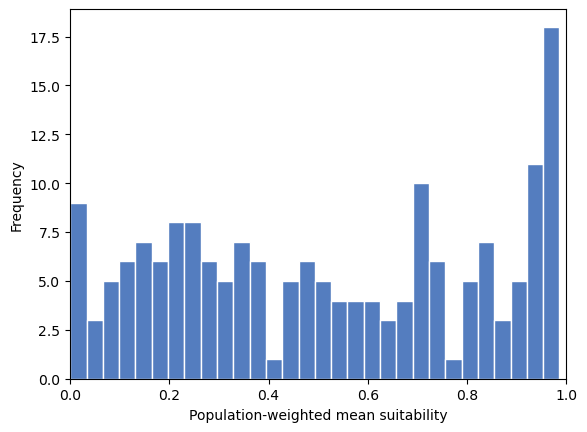

In [5]:
plt.hist(suit_vals, bins=30, color='#547dbf', edgecolor='white')

plt.xlabel('Population-weighted mean suitability')
plt.ylabel('Frequency')
plt.xlim(0, 1);

In [6]:
def plot_suit_transform(fact_f, fact_k):
    suit_vals_new = fact_f*suit_vals**fact_k
    plt.hist(suit_vals_new, bins=30, color='#547dbf', edgecolor='white')
    plt.xlabel('Population-weighted mean suitability')
    plt.ylabel('Frequency')
    plt.xlim(0, 1); # typical
    # plt.xlim(0, 0.2); # typical

# initial values 
fact_f = 1
fact_k = 1

# widgets
fact_f_widget = FloatSlider(min=0.05, max=1.1, step=0.05, value=fact_f, readout_format='.2f')
fact_f_widget.continuous_update=False

fact_k_widget = FloatSlider(min=0.01, max=1, step=0.01, value=fact_k, readout_format='.2f')
fact_k_widget.continuous_update=False

# interactive plot with sliders 
interactive(plot_suit_transform, fact_f=fact_f_widget, fact_k=fact_k_widget)

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='fact_f', max=1.1, min=0.05,…

In [7]:
def plot_suit_transform_incr(prop_boost):
    suit_vals_new = np.where(suit_vals < prop_boost, np.sqrt(2*suit_vals)/2, suit_vals)
    plt.hist(suit_vals_new, bins=30, color='#547dbf', edgecolor='white')
    plt.xlabel('Population-weighted mean suitability')
    plt.ylabel('Frequency')
    plt.xlim(0, 1); # typical
    plt.ylim(0, 20); # typical

# initial values 
prop_boost = 0.5

# widgets
prop_boost_widget = FloatSlider(min=0.0, max=1, step=0.05, value=prop_boost, readout_format='.2f')
prop_boost_widget.continuous_update=False


# interactive plot with sliders 
interactive(plot_suit_transform_incr, prop_boost=prop_boost_widget)

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='prop_boost', max=1.0, step=…

In [9]:
def plot_suit_transform_decr(prop_boost):
    suit_vals_new = np.where(suit_vals > prop_boost, (suit_vals)**2, suit_vals)
    plt.hist(suit_vals_new, bins=30, color='#547dbf', edgecolor='white')
    plt.xlabel('Population-weighted mean suitability')
    plt.ylabel('Frequency')
    plt.xlim(0, 1); # typical
    plt.ylim(0, 20); # typical

# initial values 
prop_boost = 0.5

# widgets
prop_boost_widget = FloatSlider(min=0.0, max=1, step=0.05, value=prop_boost, readout_format='.2f')
prop_boost_widget.continuous_update=False


# interactive plot with sliders 
interactive(plot_suit_transform_decr, prop_boost=prop_boost_widget)

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='prop_boost', max=1.0, step=…